# Decision Trees

*Decision Trees* are versatile Machine Learning algorithms that can perform both classification and regression tasks. They are powerful algorithms, capable of fitting complex datasets.

## Training and Visualizing a Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] #petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Populating the interactive namespace from numpy and matplotlib


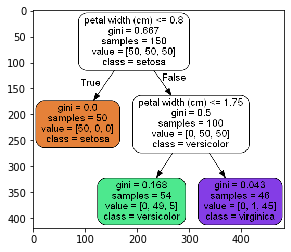

In [2]:
from sklearn.tree import export_graphviz
import os
from graphviz import Source

os.environ["PATH"] += os.pathsep + 'D:\Anaconda\pkgs\graphviz-2.38-hfd603c8_2\Library\bin'

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

#To install Graphviz Prompt and: conda install python-graphviz
#To convert use the script dot -Tpng iris_tree.dot -o name.png

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('iris_tree.png')
imgplot = plt.imshow(img)
plt.show()

## Making Predictions

One of the many qualities of Decision Trees is that they require very little data preparation. In fact, they don't require feature scaling or centering at all.

Node's **Samples** attribute counts how many training instances it applies to.
**Value** attribut tells you how many training instances of each class this node aplies to.
**Gini** attribute measures its impurity: a nos is "pure" (gini=0) if all training insances it applies to belong to the same class.

**Equation Gini impurity**

$G_{i} = 1 - \sum_{k=1}^{n} p_{i,k}{2}$

- $p_{i,k}$ is the ratio of class k instances among the training instances of the $i^{th}$ node.

## Estimating Class Probabilites

A Decision Tree can also estimate the probability that an instance belongs to a particular class *k*.First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class *k* in this node.

In [3]:
tree_clf.predict_proba([[5, 1.5]]) #Iris setosa, iris versicolor, iris virginica

array([[0.        , 0.90740741, 0.09259259]])

In [4]:
tree_clf.predict([[5,1.5]]) #iris versicolor

array([1])

## The CART Training Algorithm

Scikit-Learn uses the *Classification and Regression Tree* (CART) algorithm to train Decision Trees (also called "growing" trees). The algorithm works by first splitting the training set into two subsets using a single feature *k* and a threshold $t_{k}$. How does it choose *k* and $t_{k}$? It seacrhes for the pair (k, $t_{k}$) that produces the purest subsets.

**Equation CART cost function for classification**

$J(k, t_{k}) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$

$where \left\{ \begin{array}{lcc}
             G_{left/right} \mbox{measures the impurity of the left/right subset},\\
             \\ m_{left/right} \mbox{is the number of instances in the left/right subset}.
             \end{array}
       \right.$


Finding the optimal tree is known to be an *NP-Complete* problem: it requires O(exp(m)) time, making the problem intractable even for small training sets. This is why we must settle for a "reasonably good" solution.

## Gini Impurity or Entropy?

By default, the Gini impurity measure is used, but you can select the entropy impuritymeasure instead by setting the criterion hyperparameter to "entropy". In Machine Learning, entropy is frequently used as an impurity measure: a set's entropy is zero when it contains instances of only one class.

Gini impurity is slightly faster to compute so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of tree, while entropy tends to produce slightly more balanced trees.

## Regularization Hyperparameters

The DecissionTreeClasifier class has other parameters that similarly restrict the shape of the Decision Tree: 
- min_samples_split (the minimum number of samples a node must have before it can be split)
- min_samples_leaf (the minimum number of samples a leaf node must have)
- min_wieght_fraction_leaf (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances)
- max_leaf_nodes (the maximum number of leaf nodes)
- max_features (the maximum number of features that are evaluated for splitting at each node).

Increasing min_* hyperparameter or reducing max_* hyperparameters will regularize the model.

## Regression

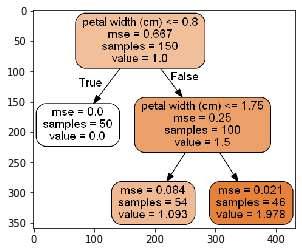

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

export_graphviz(
        tree_reg,
        out_file="iris_reg.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
img=mpimg.imread('name.png')
imgplot = plt.imshow(img)
plt.show()

The CART algorithm works mostly the same way as earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE.

**Equation CART cost function for regression**

$J(k, t_{k}) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$

$where \left\{ \begin{array}{lcc}
             M_{left/right} = \sum_{i \epsilon node} (\hat{y}_{node} - y^{(i)})^{2},\\
             \\ \hat{y}_{node} = \frac{1}{m_{node}}\sum_{i \epsilon node}y^{(i)}.
             \end{array}
       \right.$


## Instability

Decision Trees have a few limitations, they love orthogonal decision boundaries which makes them sensitive to training set rotation. One way to limit this problem is to use Principal Component Analaysis(Chapter8), which often results in a better oritentation of the training data.

Random Forests can limit this instability by averaging 